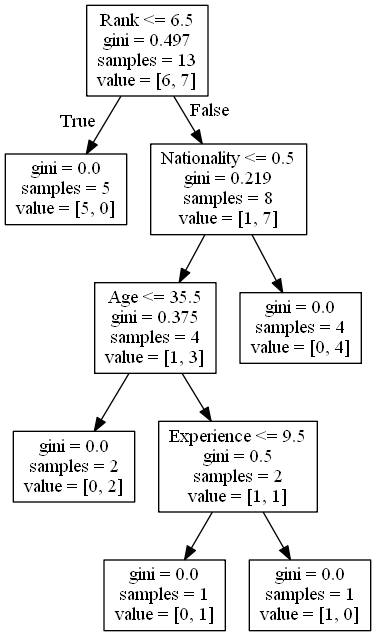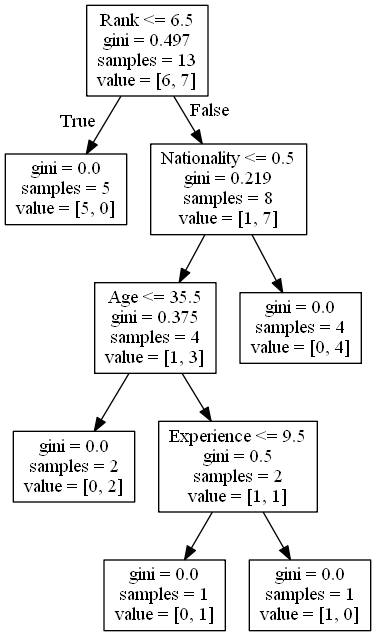

# Decision Tree

In this chapter we will show you how to make a "Decision Tree". A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

In the example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, and registered some information about the comedian, and also registered if he/she went or not.

Age 	Experience 	Rank 	Nationality 	Go

36 	10 	9 	UK 	NO

42 	12 	4 	USA 	NO

23 	4 	6 	N 	NO

52 	4 	4 	USA 	NO

43 	21 	8 	USA 	YES

44 	14 	5 	UK 	NO

66 	3 	7 	N 	YES

35 	14 	9 	UK 	YES

52 	13 	7 	N 	YES

35 	5 	9 	N 	YES

24 	3 	5 	USA 	NO

18 	3 	7 	UK 	YES

45 	9 	9 	UK 	YES

Now, based on this data set, Python can create a decision tree that can be used to decide if any new shows are worth attending to.

# How Does it Work?

First, read the dataset with pandas:
# Example

Read and print the data set:

In [2]:
! conda install -y gdown

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    filelock-3.8.0             |     pyhd8ed1ab_0          13 KB  conda-forge
    gdown-4.5.1                |     pyhd8ed1ab_0          17 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.8.0-pyhd8ed1ab_0
  gdown              conda-forge/noarch::gdown-4.5.1-pyhd8ed1ab_0

The following packages will be

In [3]:
!gdown --id 1yrQvEVcRd01v2vDrC3-3cH1uIcFfM6VR

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yrQvEVcRd01v2vDrC3-3cH1uIcFfM6VR
To: /kaggle/working/data2.csv
100%|███████████████████████████████████████████| 231/231 [00:00<00:00, 252kB/s]


In [4]:
import pandas

df = pandas.read_csv("./data2.csv")

print(df) 

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


To make a decision tree, all data has to be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

Pandas has a map() method that takes a dictionary with information on how to convert the values.

{'UK': 0, 'USA': 1, 'N': 2}

Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.
# Example

Change string values into numerical values:

In [5]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df) 

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


Then we have to separate the feature columns from the target column.

The feature columns are the columns that we try to predict from, and the target column is the column with the values we try to predict.
# Example

X is the feature columns, y is the target column:

In [6]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y) 

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


Now we can create the actual decision tree, fit it with our details. Start by importing the modules we need:
# Example

Create and display a Decision Tree:

[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

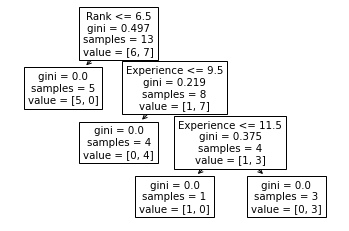

In [7]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("./data2.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features) 

# Result Explained

The decision tree uses your earlier decisions to calculate the odds for you to wanting to go see a comedian or not.

Let us read the different aspects of the decision tree:

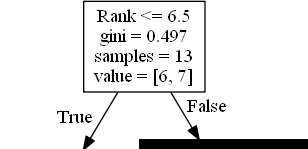!

# Rank

Rank <= 6.5 means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

gini = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.

samples = 13 means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.

value = [6, 7] means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".


# Gini

There are many ways to split the samples, we use the GINI method in this tutorial.

The Gini method uses this formula:

Gini = 1 - (x/n)2 - (y/n)2

Where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this calculation:

1 - (7 / 13)2 - (6 / 13)2 = 0.497


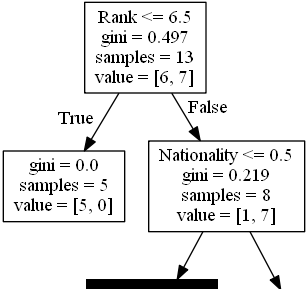

The next step contains two boxes, one box for the comedians with a 'Rank' of 6.5 or lower, and one box with the rest.

# True - 5 Comedians End Here:

gini = 0.0 means all of the samples got the same result.

samples = 5 means that there are 5 comedians left in this branch (5 comedian with a Rank of 6.5 or lower).

value = [5, 0] means that 5 will get a "NO" and 0 will get a "GO".
# False - 8 Comedians Continue:
# Nationality

Nationality <= 0.5 means that the comedians with a nationality value of less than 0.5 will follow the arrow to the left (which means everyone from the UK, ), and the rest will follow the arrow to the right.

gini = 0.219 means that about 22% of the samples would go in one direction.

samples = 8 means that there are 8 comedians left in this branch (8 comedian with a Rank higher than 6.5).

value = [1, 7] means that of these 8 comedians, 1 will get a "NO" and 7 will get a "GO".

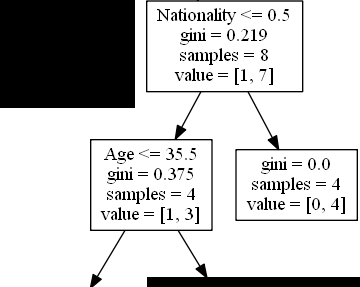

# True - 4 Comedians Continue:
# Age

Age <= 35.5 means that comedians at the age of 35.5 or younger will follow the arrow to the left, and the rest will follow the arrow to the right.

gini = 0.375 means that about 37,5% of the samples would go in one direction.

samples = 4 means that there are 4 comedians left in this branch (4 comedians from the UK).

value = [1, 3] means that of these 4 comedians, 1 will get a "NO" and 3 will get a "GO".
# False - 4 Comedians End Here:

gini = 0.0 means all of the samples got the same result.

samples = 4 means that there are 4 comedians left in this branch (4 comedians not from the UK).

value = [0, 4] means that of these 4 comedians, 0 will get a "NO" and 4 will get a "GO".

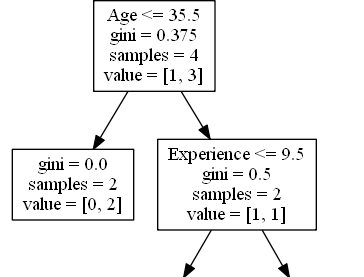

# True - 2 Comedians End Here:

gini = 0.0 means all of the samples got the same result.

samples = 2 means that there are 2 comedians left in this branch (2 comedians at the age 35.5 or younger).

value = [0, 2] means that of these 2 comedians, 0 will get a "NO" and 2 will get a "GO".
# False - 2 Comedians Continue:
# Experience

Experience <= 9.5 means that comedians with 9.5 years of experience, or less, will follow the arrow to the left, and the rest will follow the arrow to the right.

gini = 0.5 means that 50% of the samples would go in one direction.

samples = 2 means that there are 2 comedians left in this branch (2 comedians older than 35.5).

value = [1, 1] means that of these 2 comedians, 1 will get a "NO" and 1 will get a "GO".


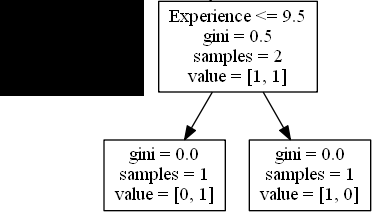

# True - 1 Comedian Ends Here:

gini = 0.0 means all of the samples got the same result.

samples = 1 means that there is 1 comedian left in this branch (1 comedian with 9.5 years of experience or less).

value = [0, 1] means that 0 will get a "NO" and 1 will get a "GO".
# False - 1 Comedian Ends Here:

gini = 0.0 means all of the samples got the same result.

samples = 1 means that there is 1 comedians left in this branch (1 comedian with more than 9.5 years of experience).

value = [1, 0] means that 1 will get a "NO" and 0 will get a "GO".


# Predict Values

We can use the Decision Tree to predict new values.

Example: Should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?
# Example

Use predict() method to predict new values:

In [24]:
print(dtree.predict([[40, 10, 7, 1]])) 

[0]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Example

What would the answer be if the comedy rank was 6?

In [29]:
print(dtree.predict([[40, 10, 6, 1]])) 

[0]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"



# Different Results

You will see that the Decision Tree gives you different results if you run it enough times, even if you feed it with the same data.

That is because the Decision Tree does not give us a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.
